In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [4]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

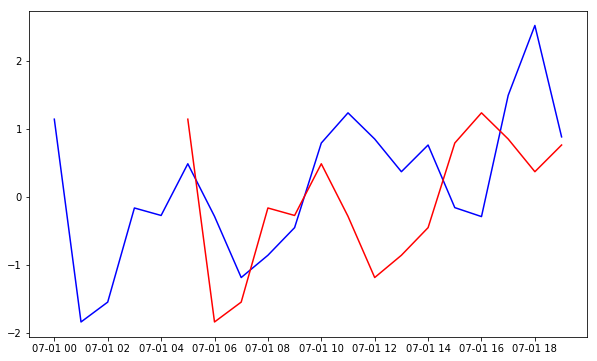

In [5]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the past' instead of into the future?

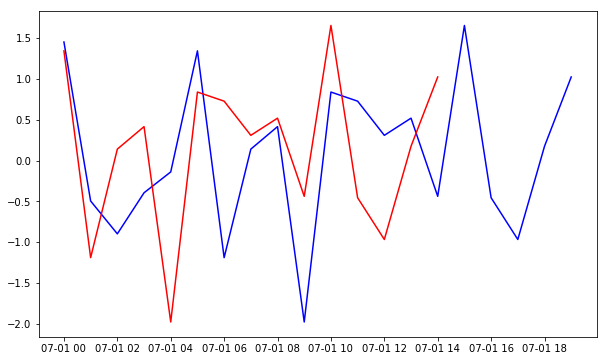

In [6]:
# %load snippets/shift_future.py
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(-5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [7]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [8]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [9]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

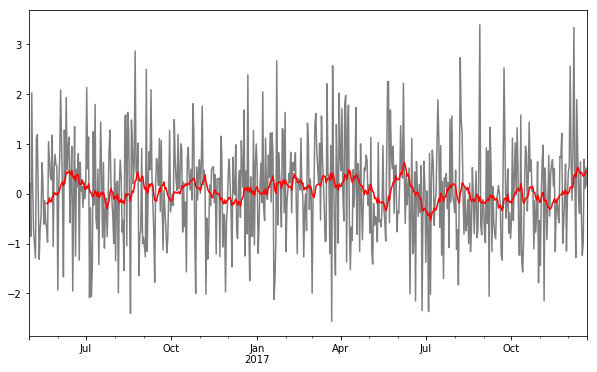

In [10]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

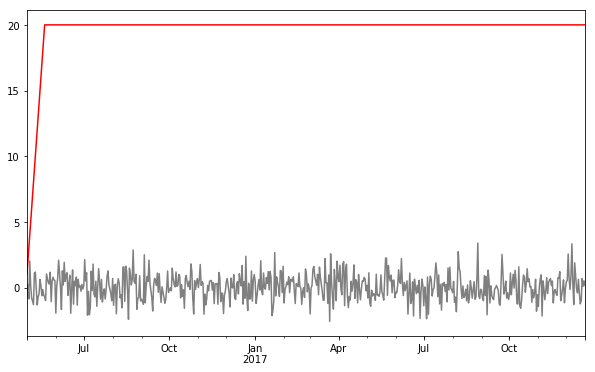

In [12]:
df['A'].plot(color = 'gray')
r.count()['A'].plot(color = 'red')

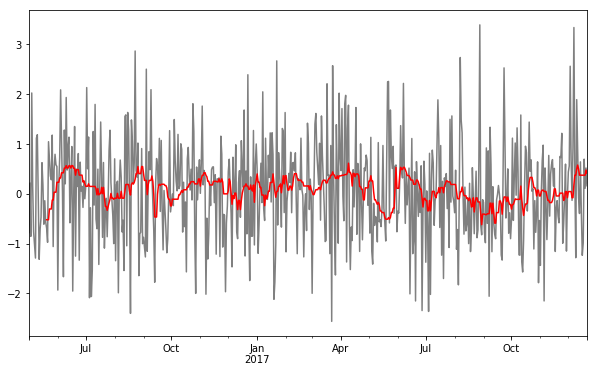

In [13]:
df['A'].plot(color = 'gray')
r.median()['A'].plot(color = 'red')

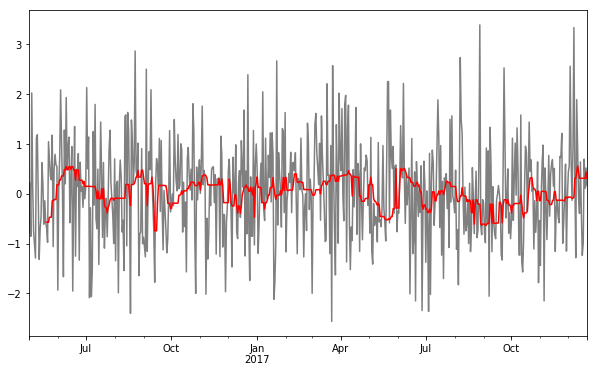

In [15]:
df['A'].plot(color = 'gray')
r.quantile(.5)['A'].plot(color = 'red')

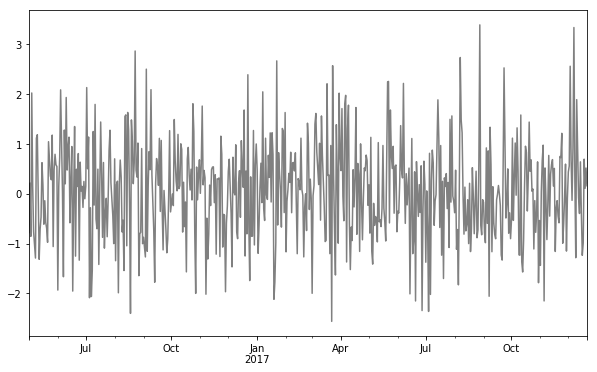

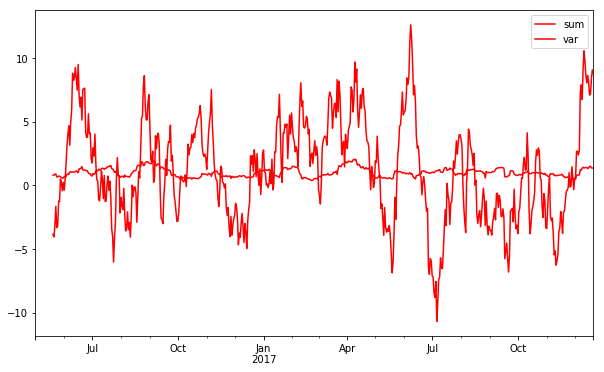

In [17]:
df['A'].plot(color = 'gray')
r.agg(['sum', 'var'])['A'].plot(color = 'red')

### What about a custom function?

In [20]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[10:30]

,A,B,C
2016-05-11,-0.422983,0.762334,0.230189
2016-05-12,13.013951,-5.321486,-2.356756
2016-05-13,-0.203590,1.963521,2.541744
2016-05-14,0.736416,-0.152683,-0.242402
2016-05-15,0.803556,0.502394,-15.374923
2016-05-16,-1.156019,2.032990,-0.213430
2016-05-17,0.941884,-1.979459,0.853250
2016-05-18,-10.214047,-0.820916,-0.607833
2016-05-19,0.088144,0.620335,0.905528
2016-05-20,1.852726,0.604938,3.012637


### What if I want to generate a rolling window function of monthly data from daily data?

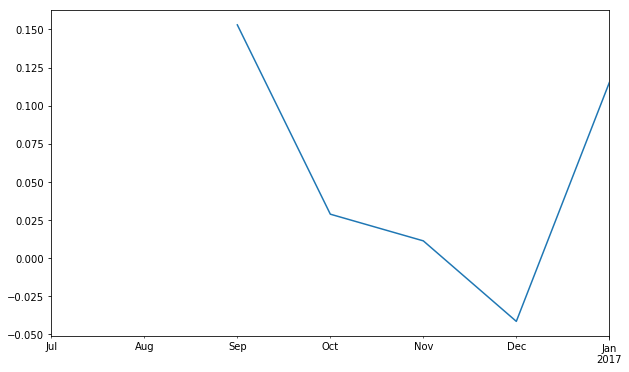

In [22]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot()

## Expanding windows

In [23]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-0.282972,0.445552,0.526392
2016-05-03,-0.474219,-0.004141,0.477598
2016-05-04,0.150687,-0.299409,0.770912
2016-05-05,0.151676,-0.194983,0.476634


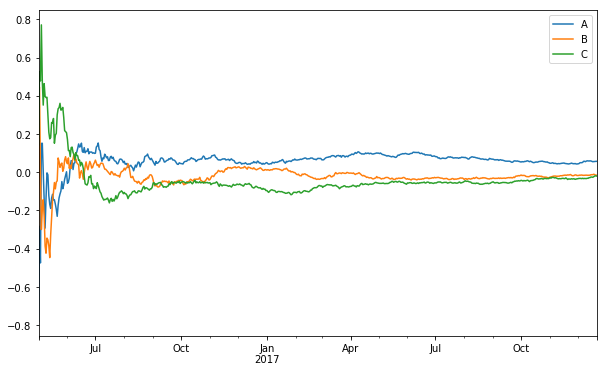

In [24]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

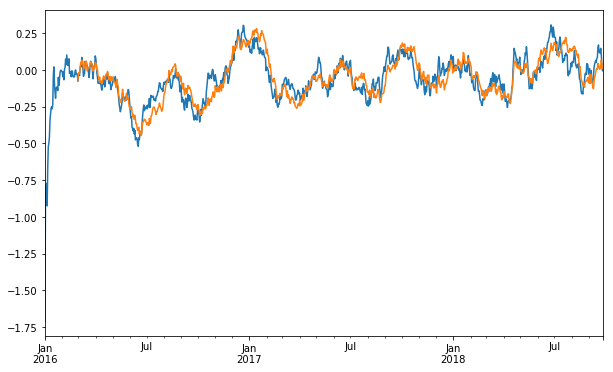

In [27]:

#1
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

#2 
# To get a more reliable statistic if it makes logical sense



In [29]:
#3
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])



,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,NaN,NaN,NaN


In [30]:
#4
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()

A         B         C      
           sum count sum count sum count
2016-05-01 NaN   1.0 NaN   1.0 NaN   1.0
2016-05-02 NaN   2.0 NaN   2.0 NaN   2.0
2016-05-03 NaN   3.0 NaN   3.0 NaN   3.0
2016-05-04 NaN   4.0 NaN   4.0 NaN   4.0
2016-05-05 NaN   5.0 NaN   5.0 NaN   5.0